In [114]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [115]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [116]:
train_labels[2]

0

In [117]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [118]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [119]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

##### Time to feed our NN:

In [120]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [121]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

hiddenlayers = 3
hidden_units = hu = 16
act = 'relu'

if(hiddenlayers == 1): 
    model.add(layers.Dense(1, activation='sigmoid'))
if(hiddenlayers == 3):
    model.add(layers.Dense(hu, activation=act, input_shape=(10000,)))
    model.add(layers.Dense(hu, activation=act))
    model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 330us/step - loss: 0.1928 - acc: 0.7528 - val_loss: 0.1424 - val_acc: 0.8679
Epoch 2/20
15000/15000 [==============================] - 4s 239us/step - loss: 0.1103 - acc: 0.8971 - val_loss: 0.1042 - val_acc: 0.8853
Epoch 3/20
15000/15000 [==============================] - 3s 231us/step - loss: 0.0763 - acc: 0.9239 - val_loss: 0.0899 - val_acc: 0.8893
Epoch 4/20
15000/15000 [==============================] - 4s 236us/step - loss: 0.0581 - acc: 0.9405 - val_loss: 0.0853 - val_acc: 0.8881
Epoch 5/20
15000/15000 [==============================] - 3s 224us/step - loss: 0.0451 - acc: 0.9536 - val_loss: 0.0829 - val_acc: 0.8898
Epoch 6/20
15000/15000 [==============================] - 3s 233us/step - loss: 0.0371 - acc: 0.9639 - val_loss: 0.0834 - val_acc: 0.8872
Epoch 7/20
15000/15000 [==============================] - 3s 224us/step - loss: 0.0292 - acc: 0.9743 - val_loss: 0.0843 - 

In [122]:
history_dict = history.history
acc_values = history_dict['acc']

print('1:','For 1 hidden layer (mse, 16 units) the acc = 0.9572, it\'s low level of accuracy, but it\'s also less time for all process\n')
print('2:','For more hidden units (mse, 3 layers, 64 units) it\'s more acc = 0.9986, but it\'s also more time for all process\n')
print('3:','From lecture (for Binary Crossentropy loss function, 3 layers, 16 units) acc = 0.9980')
print('   From hometask (for MSE loss function, 3 layers, 16 units) acc = ', acc_values[-1], '\n')
print('4:','For \'tanh\' activation it\'s the lowest level of accuracy (mse, 3 layers, 16 units) = 0.9905')

1: For 1 hidden layer (mse, 16 units) the acc = 0.9572, it's low level of accuracy, but it's also less time for all process

2: For more hidden units (mse, 3 layers, 64 units) it's more acc = 0.9986, but it's also more time for all process

3: From lecture (for Binary Crossentropy loss function, 3 layers, 16 units) acc = 0.9980
   From hometask (for MSE loss function, 3 layers, 16 units) acc =  0.997466666667 

4: For 'tanh' activation it's the lowest level of accuracy (mse, 3 layers, 16 units) = 0.9905


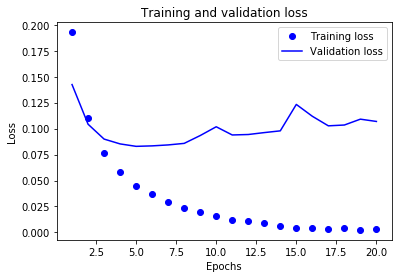

In [123]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


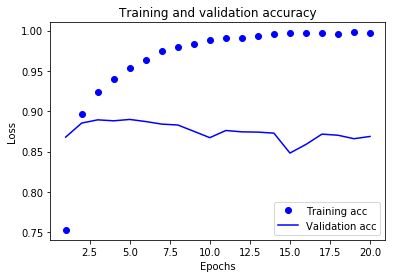

In [124]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [125]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 4s 172us/step


In [126]:
results

[0.11938871858954429, 0.85236000000000001]

In [127]:
model.predict(x_test)

array([[ 0.03869142],
       [ 1.        ],
       [ 0.96596074],
       ..., 
       [ 0.02428477],
       [ 0.03919373],
       [ 0.81530094]], dtype=float32)

# The next one 

In [128]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

print("Training examples: {}".format(len(train_data)))
print("Test examples: {}".format(len(test_data)))

print(train_data[10])

Training examples: 8982
Test examples: 2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [129]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [130]:
import numpy as np
from tensorflow.keras.utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

##### It's time to feed out NN

In [131]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [132]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

hiddenlayers = 3
hidden_units = hu = 64

if(hiddenlayers == 1): 
    model.add(layers.Dense(46, activation='softmax'))
if(hiddenlayers == 2): 
    model.add(layers.Dense(hu, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(46, activation='softmax'))
if(hiddenlayers == 3):
    model.add(layers.Dense(hu, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(hu, activation='relu'))
    model.add(layers.Dense(46, activation='softmax'))



model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 419us/step - loss: 2.5004 - acc: 0.5298 - val_loss: 1.6986 - val_acc: 0.6420
Epoch 2/20
7982/7982 [==============================] - 2s 210us/step - loss: 1.3910 - acc: 0.7081 - val_loss: 1.3059 - val_acc: 0.6960
Epoch 3/20
7982/7982 [==============================] - 2s 204us/step - loss: 1.0428 - acc: 0.7770 - val_loss: 1.1265 - val_acc: 0.7670
Epoch 4/20
7982/7982 [==============================] - 2s 200us/step - loss: 0.8264 - acc: 0.8211 - val_loss: 1.0177 - val_acc: 0.7820
Epoch 5/20
7982/7982 [==============================] - 2s 201us/step - loss: 0.6586 - acc: 0.8618 - val_loss: 0.9612 - val_acc: 0.7960
Epoch 6/20
7982/7982 [==============================] - 2s 199us/step - loss: 0.5303 - acc: 0.8900 - val_loss: 0.9112 - val_acc: 0.8130
Epoch 7/20
7982/7982 [==============================] - 2s 206us/step - loss: 0.4257 - acc: 0.9114 - val_loss: 0.8940 - val_acc: 0.8230


In [133]:
print('Aswell as at early cases:\n')
print('1+2:','For 3 hidden layers, 128 hidden units acc = 0.9583')
print('     For 2 hidden layers, 128 hidden units acc = 0.9575')
print('     For 1 hidden layers, 128 hidden units acc = 0.9446')
print('2:','For 3 hidden layers, 64 hidden units acc = 0.9563')

Aswell as at early cases:

1+2: For 3 hidden layers, 128 hidden units acc = 0.9583
     For 2 hidden layers, 128 hidden units acc = 0.9575
     For 1 hidden layers, 128 hidden units acc = 0.9446
2: For 3 hidden layers, 64 hidden units acc = 0.9563


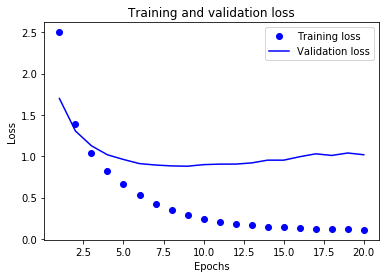

In [134]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

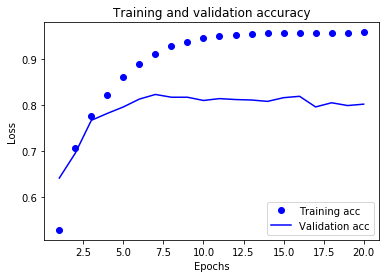

In [135]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [136]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 210us/step


[1.1760974323123243, 0.79029385574354405]

In [137]:
predictions = model.predict(x_test)

In [138]:
print('Shape: {}'.format(predictions[0].shape))
print('Sum: {:.4f}'.format(np.sum(predictions[0])))

Shape: (46,)
Sum: 1.0000


In [139]:
np.argmax(predictions[0])

3